In [161]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

##shallow DEP

#set bounds for depth
xlow = 160
xhigh= 161.5

#read DEP before 577m
shallow_dep = pd.read_csv('WD Layer Counting Files/DRI_0_577m_032217.txt', sep='\t')
shallow_dep = shallow_dep[shallow_dep['Cond(uS)'] > -0.7]

#pull layer count
wd_layer_count = pd.read_csv('WD2014 Layer Count.tab', comment="#", delimiter="\t", names=["Depth ice/snow [m]", "Cal age [ka BP] (ice age)", "Cal age std e [±] (ice age uncertainty due to an...)", "Cal age std e [±] (ice age uncertainty due to CH...)", "Gas age [ka BP] (gas age)", "Age e [±] (gas age uncertainty (2 sigma))",	"Age diff [ka] (gas age-ice age difference (d...)",	"Age diff e [±] (delta age uncertainty (2 sigma))"])
wd_layer_count["Cal age [ka BP] (ice age)"] = wd_layer_count["Cal age [ka BP] (ice age)"]*1000

#plotting layer count lines
for i in range(len(wd_layer_count["Depth ice/snow [m]"])):
    depth = wd_layer_count["Depth ice/snow [m]"][i]

    if wd_layer_count["Depth ice/snow [m]"][i] > xlow and wd_layer_count["Depth ice/snow [m]"][i] < xhigh:
        plt.axvline(x=depth, color='red', linestyle='dashed', alpha=0.6)
    else:
        continue

shallow_dep = shallow_dep[shallow_dep['Depth(m)'] > xlow]
shallow_dep = shallow_dep[shallow_dep['Depth(m)'] < xhigh]

#format graph

plt.title('Conductivity vs Depth')
plt.ylabel('Conductivity (uS)')
plt.xlabel('Depth (m)')

plt.plot(shallow_dep['Depth(m)'], shallow_dep['Cond(uS)'], color='blue', label='Conductivity')

## Recreating WD2014 p2 Fig4

Here I recreate the plot figure.
Cell 1 = Pulling data
Cell 2 = Creating plot

In [162]:
### set params

xlow = 1290
xhigh= 1294
lim = False

In [163]:
#pull layer count #######

wd_layer_count = pd.read_csv('WD2014 Layer Count.tab', comment="#", delimiter="\t", names=["Depth ice/snow [m]", "Cal age [ka BP] (ice age)", "Cal age std e [±] (ice age uncertainty due to an...)", "Cal age std e [±] (ice age uncertainty due to CH...)", "Gas age [ka BP] (gas age)", "Age e [±] (gas age uncertainty (2 sigma))",	"Age diff [ka] (gas age-ice age difference (d...)",	"Age diff e [±] (delta age uncertainty (2 sigma))"])
wd_layer_count["Cal age [ka BP] (ice age)"] = wd_layer_count["Cal age [ka BP] (ice age)"]*1000

#pull the DEP data files for the brittle ice #######

dep_brittle_tab=["0550RA.d50", "0550RB.d50"]
dep_brittle_tab_paths = [f'WD Layer Counting Files/DEP files brittle ice/{file}' for file in dep_brittle_tab]
dep_brittle_comma=["0600S.d50", "0650S.d50", "0700S.d50", "0750S.d50", "0800S.d50", "0850S.d50", "0900S.d50", "0950S.d50", "1000S.d50", "1050S.d50", "1100S.d50", "1150S.d50", "1200S.d50", "1250S.d50", "1300S.d50"]
dep_brittle_comma_paths = [f'WD Layer Counting Files/DEP files brittle ice/{file}' for file in dep_brittle_comma]

read_dep = []

for path in dep_brittle_tab_paths: #appends data with comma delims
    with open(path) as f: #determine how big header
        for i, line in enumerate(f):
            if "END HEADER" in line:
                start_line = i + 1  # Start after this line + 0 for no header
                break
    data = pd.read_csv(path, skiprows=start_line, header=None, sep=r'\s+', names=["Depth(m)", "Conductance(uS)"])
    read_dep.append(data)

for path in dep_brittle_comma_paths: #appends data with comma delims
    with open(path) as f: #determine how big header
        for i, line in enumerate(f):
            if "END HEADER" in line:
                start_line = i + 2  # Start after this line + 1 for header
                break
    data = pd.read_csv(path, skiprows=start_line, header=None, sep=',', names=["Depth(m)", "Conductance(uS)"])
    read_dep.append(data)

read_dep = pd.concat(read_dep, ignore_index=True)

#pull the ion data #######

ion_path='WD Layer Counting Files/WDC06A 577-1300 m Chemistry.xlsx'

read_ion = pd.read_excel(ion_path, header=None, skiprows=5, names=['Depth(m)', "Cl(ng/g)", "NO3(ng/g)", "SO4(ng/g)", "Na(ng/g)", "K(ng/g)", "Mg(ng/g)", "Ca(ng/g)"])

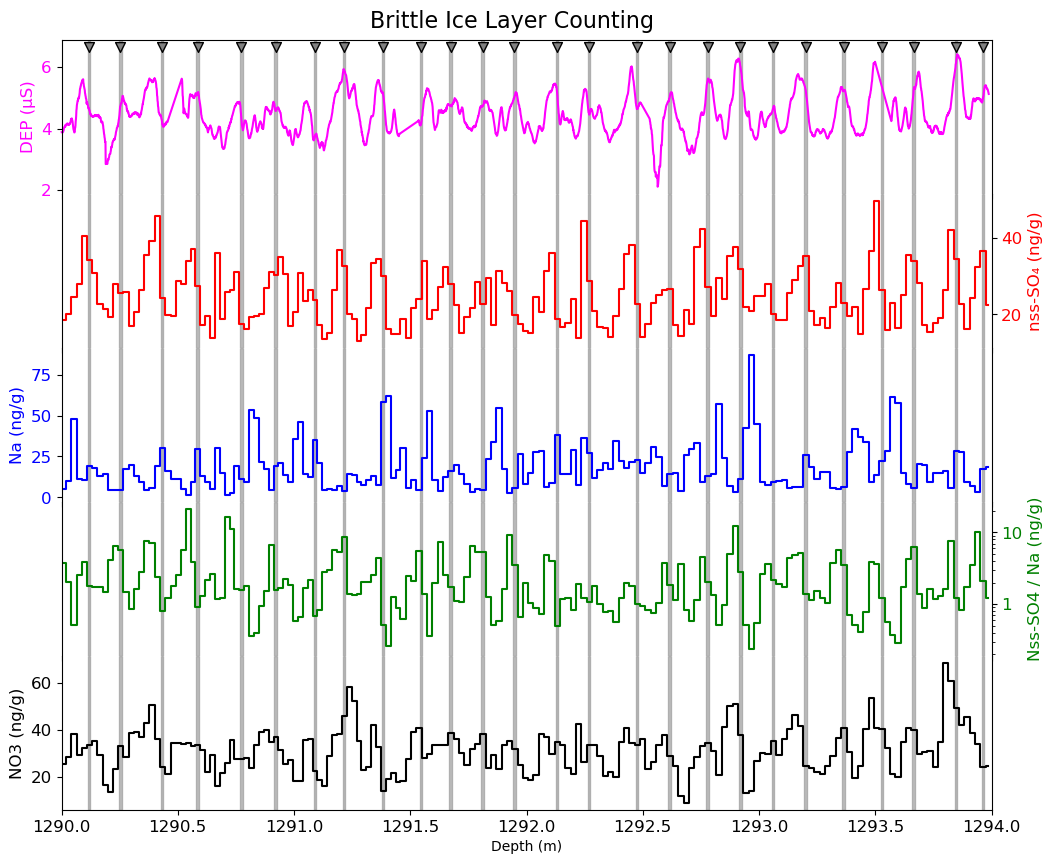

In [164]:
#create plot
from matplotlib.ticker import ScalarFormatter

#setting DEP data ranges
read_dep = read_dep[read_dep['Depth(m)'] > xlow]
read_dep = read_dep[read_dep['Depth(m)'] < xhigh]

#setting ion data ranges
read_ion = read_ion[read_ion['Depth(m)'] > xlow]
read_ion = read_ion[read_ion['Depth(m)'] < xhigh]

# Create vertically stacked plots
fig, ax = plt.subplots(5, 1, figsize=(12, 10), sharex=True)

labelfontsize = 12 # Set label font size

# Plot 1: DEP (magenta)
ax[0].plot(read_dep["Depth(m)"], read_dep["Conductance(uS)"], color='magenta', clip_on=False)
ax[0].set_ylabel("DEP (µS)", color='magenta', fontsize=labelfontsize)
ax[0].tick_params(axis='y', labelcolor='magenta')

# Plot 2: nss-SO4 (red)
ax[1].step(read_ion["Depth(m)"], read_ion["SO4(ng/g)"], where='mid', color='red', clip_on=False) #allowing spillover
ax[1].set_ylabel("nss-SO₄ (ng/g)", color='red', fontsize=labelfontsize) #assuming it is nss
ax[1].tick_params(axis='y', labelcolor='red')
ax[1].yaxis.set_label_position("right") #move to right
ax[1].yaxis.tick_right()

# Plot 3: Na (blue)
ax[2].step(read_ion["Depth(m)"], read_ion["Na(ng/g)"], where='mid', color='blue', clip_on=False)
ax[2].set_ylabel("Na (ng/g)", color='blue', fontsize=labelfontsize) 
ax[2].tick_params(axis='y', labelcolor='blue')

# Plot 4: nss-SO4/Na (blue)
ax[3].step(read_ion["Depth(m)"], (read_ion["SO4(ng/g)"]/read_ion["Na(ng/g)"]), where='mid', color='green', clip_on=False)
ax[3].set_ylabel("Nss-SO4 / Na (ng/g)", color='green', fontsize=labelfontsize) 
ax[3].tick_params(axis='y', labelcolor='green')
ax[3].set_yscale("log")  # Apply log scale
ax[3].yaxis.set_major_formatter(ScalarFormatter()) # change to normal numbers
ax[3].set_yticks([1, 10])
ax[3].set_yticklabels(["1", "10"]) #set as normal numbers
ax[3].yaxis.set_label_position("right") #move to right
ax[3].yaxis.tick_right()

# Plot 4: NO3 (black)
ax[4].step(read_ion["Depth(m)"], read_ion["NO3(ng/g)"], where='mid', color='black', clip_on=False)
ax[4].set_ylabel("NO3 (ng/g)", color='black', fontsize=labelfontsize) 
ax[4].tick_params(axis='y', labelcolor='black')

if lim == True:
    ax[1].set_ylim(0,60) #setting limits for y axis
    ax[2].set_ylim(0,80) #setting limits for y axis
    ax[4].set_ylim(10,60) #setting limits for y axis
else:
    pass

#set solid lines
for axes in ax: # all axes
    for depth in wd_layer_count["Depth ice/snow [m]"]:
        if xlow < depth < xhigh:
            axes.axvspan(depth - 0.005, depth + 0.005, color='grey', alpha=0.5)
    axes.tick_params(axis='both', labelsize=12) # Set tick label size

for axes in ax[:-1]:  # All except the bottom plot
    axes.tick_params(labelbottom=False)        # Hide x-axis tick labels
    axes.spines['bottom'].set_visible(False)# Hide x-axis spine

for axes in ax[1:]: #all except top plot
    axes.spines['top'].set_visible(False) 

#add triangles
triangle_positions = wd_layer_count["Depth ice/snow [m]"]
triangle_positions = triangle_positions[(triangle_positions > xlow) & (triangle_positions < xhigh)]
# Y position slightly above the top plot's y-limits
y_top = ax[0].get_ylim()[1] + 0.03  # Adjust as needed
ax[0].scatter(triangle_positions, [y_top]*len(triangle_positions), marker='v', color='grey', edgecolors='black', s=50, zorder=5, clip_on=False)

# Set shared X axis
ax[-1].set_xlim(xlow, xhigh)
ax[-1].set_xlabel("Depth (m)")

plt.subplots_adjust(hspace=0)
plt.suptitle("Brittle Ice Layer Counting", fontsize=16, y=0.91)
plt.show()

